<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import math

In [3]:
PATH = '/content/drive/MyDrive/Data_set/creditcard_2023.csv'

df_classification = pd.read_csv(PATH)

In [4]:
df_classification.head(8)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0


In [5]:
df_classification.shape


(568630, 30)

In [6]:
X = df_classification.drop(['Class'],axis=1)
X.shape

(568630, 29)

In [7]:
y = df_classification['Class']
y.shape

(568630,)

In [8]:
# Define X (features) and y (labels)
X = df_classification.drop(['Class'], axis=1).values
y = df_classification['Class'].values

# Step 1: Shuffle and split the dataset into Training (70%), Validation (10%), and Test (20%)
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

for a, b in zip(X, y):
    R = random.random()  # Generate a random number in the range [0, 1]
    if 0 <= R <= 0.7:
        X_train.append(a)
        y_train.append(b)
    elif 0.7 < R <= 0.8:
        X_val.append(a)
        y_val.append(b)
    else:
        X_test.append(a)
        y_test.append(b)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Print the sizes of each split
print(f"Training set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation set size: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Test set size: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set size: X_train = (398722, 29), y_train = (398722,)
Validation set size: X_val = (56395, 29), y_val = (56395,)
Test set size: X_test = (113513, 29), y_test = (113513,)


In [9]:
# Define X (features) and y (labels)
X = df_classification.drop(['Class'], axis=1).values
y = df_classification['Class'].values

# Step 1: Reduce the dataset size (e.g., use only 10% of the original data)
reduction_factor = 0.1  # Use 10% of the original data
sample_indices = np.random.choice(len(X), size=int(len(X) * reduction_factor), replace=False)
X = X[sample_indices]
y = y[sample_indices]

# Step 2: Shuffle and split the reduced dataset into Training (70%), Validation (10%), and Test (20%)
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

for a, b in zip(X, y):
    R = random.random()  # Generate a random number in the range [0, 1]
    if 0 <= R <= 0.7:
        X_train.append(a)
        y_train.append(b)
    elif 0.7 < R <= 0.8:
        X_val.append(a)
        y_val.append(b)
    else:
        X_test.append(a)
        y_test.append(b)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Print the sizes of each split
print(f"Training set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation set size: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Test set size: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set size: X_train = (39814, 29), y_train = (39814,)
Validation set size: X_val = (5713, 29), y_val = (5713,)
Test set size: X_test = (11336, 29), y_test = (11336,)


In [10]:
# Step 2: Define KNN Classification Function
def knn_predict(X_train, y_train, sample, k):
    # Calculate Euclidean distances from the sample to all training points
    distances = np.sqrt(np.sum((X_train - sample) ** 2, axis=1))
    # Find indices of the k nearest neighbors
    k_neighbors_idx = np.argsort(distances)[:k]
    # Get the classes of the k nearest neighbors
    k_neighbor_classes = y_train[k_neighbors_idx]
    # Predict the majority class
    predicted_class = np.bincount(k_neighbor_classes).argmax()
    return predicted_class



In [11]:

# Step 3: Calculate Accuracy
def calculate_accuracy(X_train, y_train, X_validation, y_validation, k):
    correct_predictions = 0
    for i in range(len(X_validation)):
        predicted_class = knn_predict(X_train, y_train, X_validation[i], k)
        if predicted_class == y_validation[i]:
            correct_predictions += 1
    accuracy = (correct_predictions / len(X_validation)) * 100
    return accuracy


In [12]:
# Step 4: Experiment with Different K Values
k_values = [1, 3, 5, 10, 15]
validation_accuracies = []

for k in k_values:
    accuracy = calculate_accuracy(X_train, y_train, X_val, y_val, k)
    validation_accuracies.append(accuracy)
    print(f"K = {k}, Validation Accuracy = {accuracy:.2f}%")

K = 1, Validation Accuracy = 85.79%
K = 3, Validation Accuracy = 85.75%
K = 5, Validation Accuracy = 83.77%
K = 10, Validation Accuracy = 77.19%
K = 15, Validation Accuracy = 73.43%


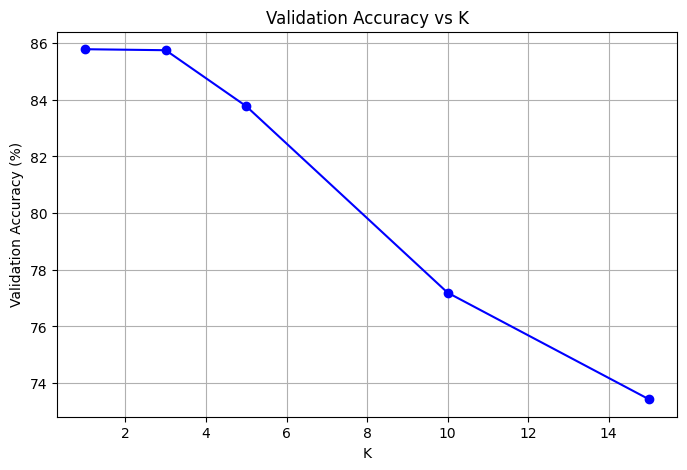

In [13]:
# Step 5: Plot Validation Accuracies
plt.figure(figsize=(8, 5))
plt.plot(k_values, validation_accuracies, marker='o', color='b')
plt.title("Validation Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Validation Accuracy (%)")
plt.grid()
plt.show()

In [14]:
# Step 6: Find the Best K and Calculate Test Accuracy
best_k = k_values[np.argmax(validation_accuracies)]
print(f"\nBest K = {best_k}, Validation Accuracy = {max(validation_accuracies):.2f}%")

test_accuracy = calculate_accuracy(X_train, y_train, X_test, y_test, best_k)
print(f"\nTest Accuracy using Best K = {best_k}: {test_accuracy:.2f}%")


Best K = 1, Validation Accuracy = 85.79%

Test Accuracy using Best K = 1: 85.73%
